In [179]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import researchpy as rp

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [146]:
df = pd.read_csv('~/Downloads/movies.csv')

In [147]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [148]:
for col in df.columns:
    pc_missing = np.mean(df[col].isnull()) #Find the % of missing values
    print('{} - {:.2f}%'.format(col, pc_missing))

name - 0.00%
rating - 0.01%
genre - 0.00%
year - 0.00%
released - 0.00%
score - 0.00%
votes - 0.00%
director - 0.00%
writer - 0.00%
star - 0.00%
country - 0.00%
budget - 0.28%
gross - 0.02%
company - 0.00%
runtime - 0.00%


In [149]:
null = pd.isnull(df)
null

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
7666,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False


In [150]:
pd.isnull(df).sum() #Number of missing values per column

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [151]:
pd.isnull(df).sum().sum() #Total number of missing values

2473

In [152]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [153]:
df = df.dropna(subset = ['budget', 'gross'])

In [154]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [155]:
df['released'] = df['released'].astype('string')

In [156]:
# Create correct released country column 
df['released_country'] = df['released'].str.extract(r'\((.*?)\)')

In [157]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [158]:
# Show all rows
pd.set_option('display.max_rows', None)

# Show 60 rows
pd.options.display.max_rows = 60

In [161]:
# Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
633                                     NaN
Name: company, Length: 1482, dtype: object

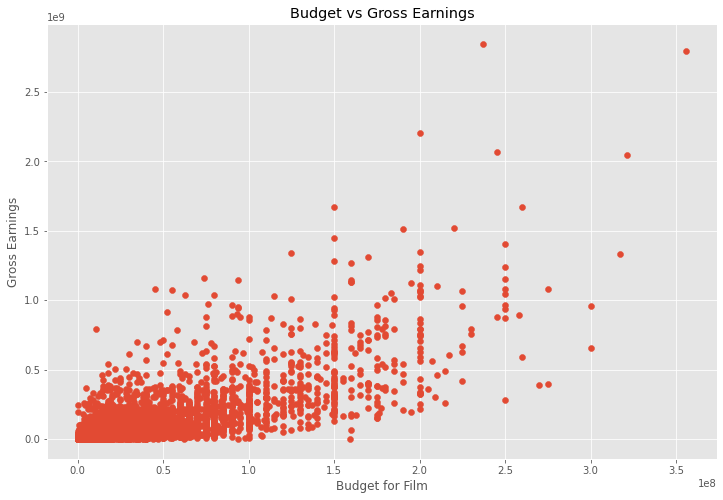

In [162]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film')

plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

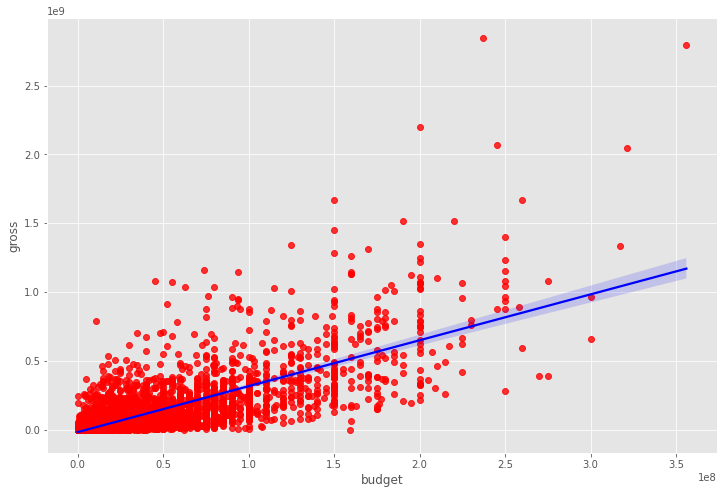

In [163]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [164]:
# Correlation: pearson (default), kendall, spearman
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


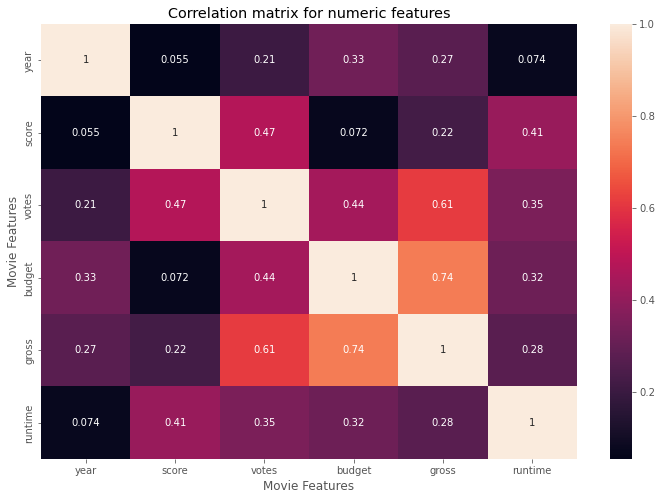

In [165]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for numeric features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [215]:
corr_pairs = correlation_matrix.unstack()

sorted_pairs = corr_pairs.sort_values()

high_corr_pairs = sorted_pairs[(sorted_pairs) > 0.5]

#Show highly correlated attributes in the dataset

high_corr_pairs

gross    votes      0.614904
votes    gross      0.614904
budget   gross      0.740395
gross    budget     0.740395
year     year       1.000000
budget   budget     1.000000
votes    votes      1.000000
score    score      1.000000
gross    gross      1.000000
runtime  runtime    1.000000
dtype: float64

In [173]:
# Assign numeric values to categorical values (Prepare for future hypothesis testing)
df_numerised = df.copy()

for col_name in df_numerised.columns:
    if(df_numerised[col_name].dtype == 'object'):
        df_numerised[col_name] = df_numerised[col_name].astype('category')
        df_numerised[col_name] = df_numerised[col_name].cat.codes

df_numerised

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_country
5445,387,5,0,2009,"December 18, 2009 (United States)",7.8,1100000.0,787,1265,1538,47,237000000,2847246203,1388,162.0,47
7445,389,5,0,2019,"April 26, 2019 (United States)",8.4,903000.0,106,515,1474,47,356000000,2797501328,987,181.0,47
3045,4923,5,6,1997,"December 19, 1997 (United States)",7.8,1100000.0,787,1265,1076,47,200000000,2201647264,1388,194.0,47
6663,3656,5,0,2015,"December 18, 2015 (United States)",7.8,876000.0,770,1810,357,47,245000000,2069521700,949,138.0,47
7244,390,5,0,2018,"April 27, 2018 (United States)",8.4,897000.0,106,515,1474,47,321000000,2048359754,987,149.0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2981,5,0,1993,"June 4, 1994 (South Korea)",4.5,1900.0,1810,3112,187,47,5000000,2970,1382,97.0,39
3681,1599,3,6,2000,"May 11, 2001 (Canada)",6.8,43000.0,954,1687,528,6,5000000,2554,468,108.0,8
272,2921,6,9,1982,"March 12, 1982 (United States)",3.9,2300.0,263,55,1477,47,800000,2270,584,85.0,47
2417,2401,-1,6,1993,"April 17, 1993 (Japan)",7.3,5100.0,23,1220,1687,26,11900000,596,492,134.0,25


In [177]:
df['genre'].value_counts()

Comedy       1496
Action       1417
Drama         869
Crime         400
Adventure     327
Biography     312
Animation     278
Horror        254
Fantasy        42
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

In [216]:
#Compare the average budget to produce movies of most popular genre Comedy and Action
#Using independent sample t-test
summary, results = rp.ttest(group1= df['budget'][df['genre'] == 'Comedy'], group1_name= "Comedy",
                            group2= df['budget'][df['genre'] == 'Action'], group2_name= "Action")
summary

/Users/nhatanhdang/opt/anaconda3/lib/python3.9/site-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Comedy,1496.0,2.280237e+07,2.065020e+07,5.338983e+05,2.175510e+07,2.384964e+07
1,Action,1417.0,5.841525e+07,5.574490e+07,1.480881e+06,5.551030e+07,6.132021e+07
2,combined,2913.0,4.012591e+07,4.524305e+07,8.382655e+05,3.848225e+07,4.176956e+07


In [204]:
results

,Independent t-test,results
0,Difference (Comedy - Action) =,-3.561288e+07
1,Degrees of freedom =,2.911000e+03
2,t =,-2.309360e+01
3,Two side test p value =,0.000000e+00
4,Difference < 0 p value =,0.000000e+00
5,Difference > 0 p value =,1.000000e+00
6,Cohen's d =,-8.561000e-01
7,Hedge's g =,-8.559000e-01
8,Glass's delta1 =,-1.724600e+00
9,Point-Biserial r =,-3.935000e-01


In [203]:
results_rounded = results.copy()
results_rounded['results'] = round(results_rounded['results'], 2)
results_rounded

,Independent t-test,results
0,Difference (Comedy - Action) =,-35612880.89
1,Degrees of freedom =,2911.00
2,t =,-23.09
3,Two side test p value =,0.00
4,Difference < 0 p value =,0.00
5,Difference > 0 p value =,1.00
6,Cohen's d =,-0.86
7,Hedge's g =,-0.86
8,Glass's delta1 =,-1.72
9,Point-Biserial r =,-0.39


Conclusion: There is a statistically significant difference in the average budget spent on producing Comedy and Action movies. Budget spent on Comedy movies, on average, is lower than budget spent on Action movies
(t = -23.09, p-value < 0.001)